<a href="https://colab.research.google.com/github/ArrogantNobody/CV_study/blob/master/5_image_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

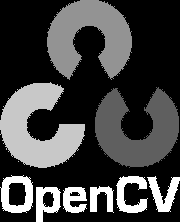

In [2]:
img = cv2.imread('/content/drive/MyDrive/CV_study/images/opencv-logo-white.png',0)
cv2_imshow(img)

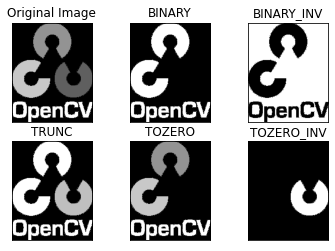

In [3]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

自适应阈值
前面部分使用了全局值作为阈值。在图片光照条件不同的情况下可能效果不好。现在选用自适应阈值，该算法计算图片一小部分区域的阈值。所以可以获得相同图片不同区域的阈值，并且能提供给用户在变化光照情况系下更好的结果。

有三个特别的输入参数，只有一个输出。

第一个参数：自适应方法 决定阈值如何被计算。

cv2.ADAPTIVE_THRESH_MEAN_C 阈值取邻近区域的平均值
cv2.ADAPTIVE_THRESH_GAUSSIAN_C 阈值取带权邻近区域值的和，并且权值是高斯窗口
第二个参数：区域大小
邻近区域的大小

第三个参数：在计算均值和带权均值时减去的常量。

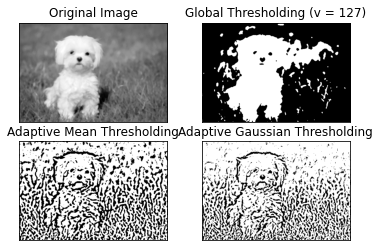

In [4]:
img2 = cv2.imread('/content/drive/MyDrive/MM811/Ultrasound project/dog.jpeg',0)
img = cv2.medianBlur(img2,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Otsu’s算法可以自己找到一个认为最好的阈值。并且Otsu’s非常适合于图像灰度直方图具有双峰的情况，他会在双峰之间找到一个值作为阈值，对于非双峰图像，可能并不是很好用。那么经过Otsu’s得到的那个阈值就是函数cv2.threshold的第一个参数了。因为Otsu’s方法会产生一个阈值，那么函数cv2.threshold的的第二个参数（设置阈值）就是0了，并且在cv2.threshold的方法参数中还得加上语句cv2.THRESH_OTSU。那么什么是双峰图像（只能是灰度图像才有），就是图像的灰度统计图中可以明显看出只有两个波峰，比如下面一个图的灰度直方图就可以是双峰图：

160.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6787799048>,
 <matplotlib.image.AxesImage at 0x7f67874a2cf8>)

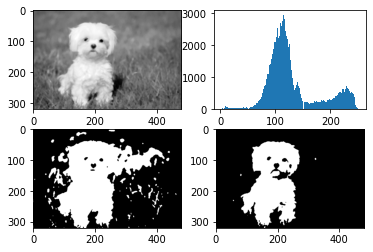

In [6]:
#普通滤波器
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#Otsu 滤波
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret2)
plt.figure()
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.hist(img.ravel(),256)#.ravel方法将矩阵转化为一维
plt.subplot(223),plt.imshow(th1,'gray')
plt.subplot(224),plt.imshow(th2,'gray')